In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import re
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchcam.methods import GradCAM
import RNA
from torch.utils.data import DataLoader, Dataset, random_split
from sklearn.model_selection import KFold

In [2]:
# df = pd.read_csv("~/internship/modeling/GNN_autoencoder/data/p04_clinvar_summary_processed_target.csv")
# df.head()

,spacer_add_g,spacer_length,scaffold,target_seq,editing_position,Eff,sec_struc
0,CAGATGGGGCTCCTGGATCA,20,GTCATAGTTCCATTAAAGCCAAAAGTGGCTTTGATGTTTCTATGAT...,CAACTGTGTCGGAAGGTCAAGTTCCAGGTGGACTTCAACCTGATCA...,-25,0.0,CAGATGGGGCTCCTGGATCAGTCATAGTTCCATTAAAGCCAAAAGT...
1,GTGTAATCGACTCGAACTTCGTGT,24,GTCATAGTTCCATTAAAGCCAAAAGTGGCTTTGATGTTTCTATGAT...,GCTGTTATTGCAGCCATTGGGGACCGCAGCAAGAAGGACCAGAGCC...,-25,0.0,GTGTAATCGACTCGAACTTCGTGTGTCATAGTTCCATTAAAGCCAA...
2,TGCCTCCTTCATGCCTGAAGCGT,23,GTCATAGTTCCATTAAAGCCAAAAGTGGCTTTGATGTTTCTATGAT...,CTGCCTCGCATCAGCGTGATCAGCACTGGCCCCACGCTTCAGGCAT...,-25,0.0,TGCCTCCTTCATGCCTGAAGCGTGTCATAGTTCCATTAAAGCCAAA...
3,TCAAGGCTTGTGGCCACGGCACC,23,GTCATAGTTCCATTAAAGCCAAAAGTGGCTTTGATGTTTCTATGAT...,CTGTCCACGGTCAGCGCCAACACCACCAACATGGACGAGGTGCCGT...,-25,0.0,TCAAGGCTTGTGGCCACGGCACCGTCATAGTTCCATTAAAGCCAAA...
4,TGGTCACCCTCGATCTCTCAACACG,25,GTCATAGTTCCATTAAAGCCAAAAGTGGCTTTGATGTTTCTATGAT...,CCCTGTGTCGAAAGCATGAAGGACAACGTGTTGAGAGATCGAGGGT...,-25,0.0,TGGTCACCCTCGATCTCTCAACACGGTCATAGTTCCATTAAAGCCA...


In [3]:
# df_dot = pd.read_csv("~/internship/modeling/GNN_autoencoder/data/p04_clinvar_summary_processed.csv")
# df_dot.head()

,spacer_add_g,spacer_length,scaffold,editing_position,Eff,sec_struc,dot_bracket
0,CAGATGGGGCTCCTGGATCA,20,GTCATAGTTCCATTAAAGCCAAAAGTGGCTTTGATGTTTCTATGAT...,-25,0.0,CAGATGGGGCTCCTGGATCAGTCATAGTTCCATTAAAGCCAAAAGT...,.((((((((...........(((((((...(((((((((((....)...
1,GTGTAATCGACTCGAACTTCGTGT,24,GTCATAGTTCCATTAAAGCCAAAAGTGGCTTTGATGTTTCTATGAT...,-25,0.0,GTGTAATCGACTCGAACTTCGTGTGTCATAGTTCCATTAAAGCCAA...,((((...((..(((((.(((...((((((((...(((((((((((....
2,TGCCTCCTTCATGCCTGAAGCGT,23,GTCATAGTTCCATTAAAGCCAAAAGTGGCTTTGATGTTTCTATGAT...,-25,0.0,TGCCTCCTTCATGCCTGAAGCGTGTCATAGTTCCATTAAAGCCAAA...,.(((.((((((....)))))..((((((((...(((((((((((.....
3,TCAAGGCTTGTGGCCACGGCACC,23,GTCATAGTTCCATTAAAGCCAAAAGTGGCTTTGATGTTTCTATGAT...,-25,0.0,TCAAGGCTTGTGGCCACGGCACCGTCATAGTTCCATTAAAGCCAAA...,....((((...))))(((.(((.(((((((...(((((((((((.....
4,TGGTCACCCTCGATCTCTCAACACG,25,GTCATAGTTCCATTAAAGCCAAAAGTGGCTTTGATGTTTCTATGAT...,-25,0.0,TGGTCACCCTCGATCTCTCAACACGGTCATAGTTCCATTAAAGCCA...,..(((((..((((.((((.......(((((((...(((((((((((...


In [4]:
# df['dot_bracket'] = df_dot['dot_bracket']

In [5]:
# df.head()

,spacer_add_g,spacer_length,scaffold,target_seq,editing_position,Eff,sec_struc,dot_bracket
0,CAGATGGGGCTCCTGGATCA,20,GTCATAGTTCCATTAAAGCCAAAAGTGGCTTTGATGTTTCTATGAT...,CAACTGTGTCGGAAGGTCAAGTTCCAGGTGGACTTCAACCTGATCA...,-25,0.0,CAGATGGGGCTCCTGGATCAGTCATAGTTCCATTAAAGCCAAAAGT...,.((((((((...........(((((((...(((((((((((....)...
1,GTGTAATCGACTCGAACTTCGTGT,24,GTCATAGTTCCATTAAAGCCAAAAGTGGCTTTGATGTTTCTATGAT...,GCTGTTATTGCAGCCATTGGGGACCGCAGCAAGAAGGACCAGAGCC...,-25,0.0,GTGTAATCGACTCGAACTTCGTGTGTCATAGTTCCATTAAAGCCAA...,((((...((..(((((.(((...((((((((...(((((((((((....
2,TGCCTCCTTCATGCCTGAAGCGT,23,GTCATAGTTCCATTAAAGCCAAAAGTGGCTTTGATGTTTCTATGAT...,CTGCCTCGCATCAGCGTGATCAGCACTGGCCCCACGCTTCAGGCAT...,-25,0.0,TGCCTCCTTCATGCCTGAAGCGTGTCATAGTTCCATTAAAGCCAAA...,.(((.((((((....)))))..((((((((...(((((((((((.....
3,TCAAGGCTTGTGGCCACGGCACC,23,GTCATAGTTCCATTAAAGCCAAAAGTGGCTTTGATGTTTCTATGAT...,CTGTCCACGGTCAGCGCCAACACCACCAACATGGACGAGGTGCCGT...,-25,0.0,TCAAGGCTTGTGGCCACGGCACCGTCATAGTTCCATTAAAGCCAAA...,....((((...))))(((.(((.(((((((...(((((((((((.....
4,TGGTCACCCTCGATCTCTCAACACG,25,GTCATAGTTCCATTAAAGCCAAAAGTGGCTTTGATGTTTCTATGAT...,CCCTGTGTCGAAAGCATGAAGGACAACGTGTTGAGAGATCGAGGGT...,-25,0.0,TGGTCACCCTCGATCTCTCAACACGGTCATAGTTCCATTAAAGCCA...,..(((((..((((.((((.......(((((((...(((((((((((...


In [6]:
# df = df.rename(columns={'spacer_add_g':'spacer', 'target_seq':'target'})
# df.dropna(inplace=True)
# df.head()

,spacer,spacer_length,scaffold,target,editing_position,Eff,sec_struc,dot_bracket
0,CAGATGGGGCTCCTGGATCA,20,GTCATAGTTCCATTAAAGCCAAAAGTGGCTTTGATGTTTCTATGAT...,CAACTGTGTCGGAAGGTCAAGTTCCAGGTGGACTTCAACCTGATCA...,-25,0.0,CAGATGGGGCTCCTGGATCAGTCATAGTTCCATTAAAGCCAAAAGT...,.((((((((...........(((((((...(((((((((((....)...
1,GTGTAATCGACTCGAACTTCGTGT,24,GTCATAGTTCCATTAAAGCCAAAAGTGGCTTTGATGTTTCTATGAT...,GCTGTTATTGCAGCCATTGGGGACCGCAGCAAGAAGGACCAGAGCC...,-25,0.0,GTGTAATCGACTCGAACTTCGTGTGTCATAGTTCCATTAAAGCCAA...,((((...((..(((((.(((...((((((((...(((((((((((....
2,TGCCTCCTTCATGCCTGAAGCGT,23,GTCATAGTTCCATTAAAGCCAAAAGTGGCTTTGATGTTTCTATGAT...,CTGCCTCGCATCAGCGTGATCAGCACTGGCCCCACGCTTCAGGCAT...,-25,0.0,TGCCTCCTTCATGCCTGAAGCGTGTCATAGTTCCATTAAAGCCAAA...,.(((.((((((....)))))..((((((((...(((((((((((.....
3,TCAAGGCTTGTGGCCACGGCACC,23,GTCATAGTTCCATTAAAGCCAAAAGTGGCTTTGATGTTTCTATGAT...,CTGTCCACGGTCAGCGCCAACACCACCAACATGGACGAGGTGCCGT...,-25,0.0,TCAAGGCTTGTGGCCACGGCACCGTCATAGTTCCATTAAAGCCAAA...,....((((...))))(((.(((.(((((((...(((((((((((.....
4,TGGTCACCCTCGATCTCTCAACACG,25,GTCATAGTTCCATTAAAGCCAAAAGTGGCTTTGATGTTTCTATGAT...,CCCTGTGTCGAAAGCATGAAGGACAACGTGTTGAGAGATCGAGGGT...,-25,0.0,TGGTCACCCTCGATCTCTCAACACGGTCATAGTTCCATTAAAGCCA...,..(((((..((((.((((.......(((((((...(((((((((((...


In [7]:
# # subset the dataframe such that spacer is a substring of target 
# df = df[df.apply(lambda row: row['spacer'] in row['target'], axis=1)]
# df.reset_index(drop=True, inplace=True)

# Generating inputs

## autoencoder

In [8]:
class RNAGraphAutoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(RNAGraphAutoencoder, self).__init__()
        self.encoder = nn.ModuleList([
            GCNConv(input_dim, hidden_dim),
            GCNConv(hidden_dim, hidden_dim),
            GCNConv(hidden_dim, latent_dim)
        ])
        
        self.decoder = nn.ModuleList([
            GCNConv(latent_dim, hidden_dim),
            GCNConv(hidden_dim, hidden_dim),
            GCNConv(hidden_dim, input_dim)
        ])
        
        self.relu = nn.ReLU()
    
    def encode(self, x, edge_index):
        for layer in self.encoder:
            x = self.relu(layer(x, edge_index))
        return x
    
    def decode(self, x, edge_index):
        for layer in self.decoder:
            x = self.relu(layer(x, edge_index))
        return x
    
    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        
        # Encoding
        latent = self.encode(x, edge_index)
        
        # Decoding
        reconstructed = self.decode(latent, edge_index)
        
        return reconstructed, latent


In [9]:
# Isolate torch_geometric imports
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv, GATConv
from torch_geometric.utils import to_dense_adj
import random
input_dim = 7 
hidden_dim = 64
latent_dim = 32

model = RNAGraphAutoencoder(input_dim, hidden_dim, latent_dim)

In [47]:
model_path = '../GNN_autoencoder/p04cv_rna_graph_autoencoder_model.pth'
model.load_state_dict(torch.load(model_path))
model.eval()

RNAGraphAutoencoder(
  (encoder): ModuleList(
    (0): GCNConv(7, 64)
    (1): GCNConv(64, 64)
    (2): GCNConv(64, 32)
  )
  (decoder): ModuleList(
    (0): GCNConv(32, 64)
    (1): GCNConv(64, 64)
    (2): GCNConv(64, 7)
  )
  (relu): ReLU()
)

# converting the data to graph format 

In [42]:
# ## Prepare inputs

# dct_onehot = {'A': [1, 0, 0, 0],
#               'C': [0, 1, 0, 0],
#               'G': [0, 0, 1, 0],
#               'T': [0, 0, 0, 1],
#               'N': [0, 0, 0, 0]}

# list_input1 = []

# def pad_sequence(seq, target_length=100):
#     return seq + [dct_onehot['N']] * (target_length - len(seq))


# for idx in df.index:
#     lst = []
#     gd = df.loc[idx, 'spacer'].upper()
#     tg = df.loc[idx, 'target'].upper()

#     ## Target - pad after encoding
#     encoded_tg = [dct_onehot[i] for i in tg]
#     encoded_tg_padded = pad_sequence(encoded_tg)
#     lst.append(encoded_tg_padded)

#     ## Spacer - modify and then pad
#     lst_tg = list(tg)
#     st = tg.index(gd)
#     sp = st + len(gd)
#     for i in range(0, st):
#         lst_tg[i] = 'N'
#     for i in range(sp, len(lst_tg)):
#         lst_tg[i] = 'N'
#     encoded_spacer = [dct_onehot[i] for i in lst_tg]
#     encoded_spacer_padded = pad_sequence(encoded_spacer)
#     lst.append(encoded_spacer_padded)

#     ## Editing region - modify and then pad
#     lst_tg = list(tg)
#     pos = df.loc[idx, 'editing_position']
#     st1 = max(0, int(pos + st - 3))  # Ensure index is within bounds
#     sp1 = min(len(lst_tg), int(pos + sp + 4))  # Ensure index is within bounds
#     for i in range(0, st1):
#         lst_tg[i] = 'N'
#     for i in range(sp1, len(lst_tg)):
#         lst_tg[i] = 'N'
#     encoded_editing_region = [dct_onehot[i] for i in lst_tg]
#     encoded_editing_region_padded = pad_sequence(encoded_editing_region)
#     lst.append(encoded_editing_region_padded)

#     ## C-region + PAM - modify and then pad
#     lst_tg = list(tg)
#     for i in range(0, len(lst_tg) - 16):
#         lst_tg[i] = 'N'
#     encoded_c_region_pam = [dct_onehot[i] for i in lst_tg]
#     encoded_c_region_pam_padded = pad_sequence(encoded_c_region_pam)
#     lst.append(encoded_c_region_pam_padded)

#     ## Convert list of lists into a tensor
#     a = np.array(lst, dtype=np.float32)
#     t = torch.from_numpy(a)
#     list_input1.append(t)

# input_data1 = torch.stack(list_input1, dim=0)



# input_label = torch.Tensor([[i] for i in df.Eff.to_list()])

In [ ]:
# torch.save(input_data1, './input1_tensor.pt')
# torch.save(input_data2, './input2_tensor.pt')
# torch.save(input_label, './input_label.pt')

# Model Architecture

In [2]:
class TwoBranchCNNRegressor(nn.Module):
    def __init__(self, input_channels1, input_channels2, output_size):
        super(TwoBranchCNNRegressor, self).__init__()

        self.branch1 = nn.Sequential(
            nn.Conv2d(in_channels=input_channels1, out_channels=32, kernel_size=4, padding=(4, 4)),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=4),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=4, padding=(4, 4)),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=4),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=4, padding=(4, 4)),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4),
            nn.Dropout(0.5)
        )

        self.branch2 = nn.Sequential(
            nn.Conv2d(in_channels=input_channels2, out_channels=16, kernel_size=(3, 3), padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.MaxPool2d(kernel_size=(2, 2), stride=1),  # Reduce stride to 1
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3), padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=(2, 2), stride=1),  # Reduce stride to 1
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64), 
            nn.MaxPool2d(kernel_size=(2, 2), stride=1),  # Reduce stride to 1
            nn.Dropout(0.5)
        )

        self.fc_input_size = self.calculate_fc_input_size(input_channels1, 100, 4, input_channels2, 133, 32)
        self.fc = nn.Linear(self.fc_input_size, 64)

        self.output_layer = nn.Linear(64, output_size)

    def forward(self, x1, x2):
        x1 = self.branch1(x1)
    
        x2 = self.branch2(x2)
    
        x1 = x1.view(x1.size(0), -1)
        x2 = x2.view(x2.size(0), -1)
    
        x = torch.cat((x1, x2), dim=1)
        x = self.fc(x)
        output = self.output_layer(x)
    
        return output

    def calculate_fc_input_size(self, in_channels1, height1, width1, in_channels2, height2, width2):
        input_data1 = torch.randn(1, in_channels1, height1, width1)
        input_data2 = torch.randn(1, in_channels2, height2, width2)
    
        output1 = self.branch1(input_data1)
        output2 = self.branch2(input_data2)
    
        output1_flat = output1.numel() / output1.shape[0]  
        output2_flat = output2.numel() / output2.shape[0]  
    
        return int(output1_flat + output2_flat) 

# Loading inputs

In [51]:
input1 = torch.load('./input1_tensor.pt')
input2 = torch.load('./extracted_features_full_padded.pth')
labels = torch.load('./input_label.pt')

In [52]:
input2 = torch.stack(input2)

In [53]:
input2 = input2.unsqueeze(1)
input2.shape

torch.Size([261075, 1, 133, 32])

# Train/test split

In [36]:
class InputDataset(Dataset):
    def __init__(self, input1, input2, labels):
            self.input1 = input1
            self.input2 = input2
            self.labels = labels
    
    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        sample = {
            'input1': self.input1[idx],
            'input2': self.input2[idx],
            'label': self.labels[idx]
        }
        return sample


dataset = InputDataset(input1, input2, labels)

In [39]:
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])


In [41]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Running model

In [43]:
def train_model(model, train_loader, criterion, optimizer, device):
    model.train()  
    total_loss = 0

    for input1, input2, labels in train_loader:
        input1, input2, labels = input1.to(device), input2.to(device), labels.to(device)

        outputs = model(input1, input2)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(train_loader)
    print(f'Training Loss: {average_loss:.4f}')
    return average_loss


In [45]:
def validate_model(model, val_loader, criterion, device):
    model.eval() 
    total_loss = 0
    with torch.no_grad():  
        for input1, input2, labels in val_loader:
            input1, input2, labels = input1.to(device), input2.to(device), labels.to(device)
            outputs = model(input1, input2)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

    average_loss = total_loss / len(val_loader)
    print(f'Validation Loss: {average_loss:.4f}')
    return average_loss

In [46]:
def test_model(model, test_loader, criterion, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for input1, input2, labels in test_loader:
            input1, input2, labels = input1.to(device), input2.to(device), labels.to(device)
            outputs = model(input1, input2)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

    average_loss = total_loss / len(test_loader)
    print(f'Test Loss: {average_loss:.4f}')


In [92]:
y = [x for x in range(len(labels))]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize StratifiedKFold with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

y_edit = []
y_pred = []

for fold, (train_index, val_index) in enumerate(kf.split(y)):
    print(f"\nFold {fold + 1}")

    # Split data into training and validation sets
    train_dataset1 = torch.utils.data.Subset(input1, indices=train_index)
    train_dataset2 = torch.utils.data.Subset(input2, indices=train_index)
    train_label = torch.utils.data.Subset(labels, indices=train_index)
    
    val_dataset1 = torch.utils.data.Subset(input1, indices=val_index)
    val_dataset2 = torch.utils.data.Subset(input2, indices=val_index)
    val_label = torch.utils.data.Subset(labels, indices=val_index)
    
    train_dataset = InputDataset(input1=train_dataset1, input2=train_dataset2, labels=train_label)
    val_dataset = InputDataset(input1=val_dataset1, input2=val_dataset2, labels=val_label)
    
    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, drop_last=True)
    val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, drop_last=True)
    
    ###
    model = TwoBranchCNNRegressor(4, 1, 1)
    model.to(device)
    # Define loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    model.to(device)

    num_epochs = 50
    
    for epoch in range(num_epochs):
        lst_edit = []
        lst_pred = []
        # Training
        model.train()
        train_loss = 0.0
        for batch in train_loader:
            X1 = batch['input1'].to(device)
            X2 = batch['input2'].to(device)
            y = batch['label'].to(device)
    
            optimizer.zero_grad()
            outputs = model(X1, X2)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()
    
            train_loss += loss.item() * X1.size(0)
    
        # Validation
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for batch in val_loader:
                X1 = batch['input1'].to(device)
                X2 = batch['input2'].to(device)
                y = batch['label'].to(device)
    
                outputs = model(X1, X2)
                loss = criterion(outputs, y)
    
                val_loss += loss.item() * X1.size(0)
                
                lst_edit = lst_edit + [i[0] for i in y.tolist()]
                lst_pred = lst_pred + [i[0] for i in outputs.tolist()]
                
    
        avg_train_loss = train_loss / len(train_loader.dataset)
        avg_val_loss = val_loss / len(val_loader.dataset)
    
        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")
    y_edit = y_edit + lst_edit
    y_pred = y_pred + lst_pred
    torch.save(model, './HL_CNN_model_'+str(fold)+'.pt')



Fold 1
Calculated fc input size: 241664
Initial x1 size: torch.Size([128, 4, 100, 4])
Post-branch1 x1 size: torch.Size([128, 128, 3, 1])
Initial x2 size: torch.Size([128, 1, 133, 32])
Post-branch2 x2 size: torch.Size([128, 64, 130, 29])
Initial x1 size: torch.Size([128, 4, 100, 4])
Post-branch1 x1 size: torch.Size([128, 128, 3, 1])
Initial x2 size: torch.Size([128, 1, 133, 32])
Post-branch2 x2 size: torch.Size([128, 64, 130, 29])
Initial x1 size: torch.Size([128, 4, 100, 4])
Post-branch1 x1 size: torch.Size([128, 128, 3, 1])
Initial x2 size: torch.Size([128, 1, 133, 32])
Post-branch2 x2 size: torch.Size([128, 64, 130, 29])
Initial x1 size: torch.Size([128, 4, 100, 4])
Post-branch1 x1 size: torch.Size([128, 128, 3, 1])
Initial x2 size: torch.Size([128, 1, 133, 32])
Post-branch2 x2 size: torch.Size([128, 64, 130, 29])
Initial x1 size: torch.Size([128, 4, 100, 4])
Post-branch1 x1 size: torch.Size([128, 128, 3, 1])
Initial x2 size: torch.Size([128, 1, 133, 32])
Post-branch2 x2 size: torch

KeyboardInterrupt: 

# Loading the model

In [54]:
model = torch.load('./HL_CNN_model_0.pt')
model.eval()

TwoBranchCNNRegressor(
  (branch1): Sequential(
    (0): Conv2d(4, 32, kernel_size=(4, 4), stride=(1, 1), padding=(4, 4))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(4, 4), stride=(1, 1), padding=(4, 4))
    (5): ReLU()
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(4, 4), stride=(1, 1), padding=(4, 4))
    (9): ReLU()
    (10): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (11): Dropout(p=0.5, inplace=False)
  )
  (branch2): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


# Testing

In [ ]:
import torch
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import r2_score
# Assuming you have a loss function and a device (e.g., 'cuda:0' or 'cpu')
criterion = torch.nn.MSELoss()  # or another appropriate loss function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Transfer the model to the device
model.to(device)

all_labels = []
all_predictions = []

test_loss = 0
num_batches = 0

with torch.no_grad():
    for data in test_loader:
        input1 = data['input1'].to(device)
        input2 = data['input2'].to(device)
        labels = data['label'].to(device)

        outputs = model(input1, input2)
        loss = criterion(outputs, labels)

        test_loss += loss.item()
        num_batches += 1

        # Store predictions and labels
        all_labels.append(labels.cpu().numpy())
        all_predictions.append(outputs.cpu().numpy())

# Calculate average loss
average_test_loss = test_loss / num_batches
print(f'Average Test Loss: {average_test_loss:.4f}')

# Convert lists to numpy arrays
all_labels = np.concatenate(all_labels)
all_predictions = np.concatenate(all_predictions)

# Compute R-squared
r_squared = r2_score(all_labels, all_predictions)
print(f"R-squared: {r_squared:.4f}")

# Compute Pearson's correlation coefficient
pearson_corr, _ = pearsonr(all_labels, all_predictions)
print(f"Pearson's Correlation: {pearson_corr:.4f}")

# Compute Spearman's correlation coefficient
spearman_corr, _ = spearmanr(all_labels, all_predictions)
print(f"Spearman's Correlation: {spearman_corr:.4f}")

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

mse = mean_squared_error(all_labels, all_preds)
mae = mean_absolute_error(all_labels, all_preds)
r2 = r2_score(all_labels, all_preds)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R-squared: {r2:.4f}')

Mean Squared Error: 0.0012
Mean Absolute Error: 0.0050
R-squared: -0.0210


In [57]:
input2 = torch.load('./extracted_features_full_padded.pth')


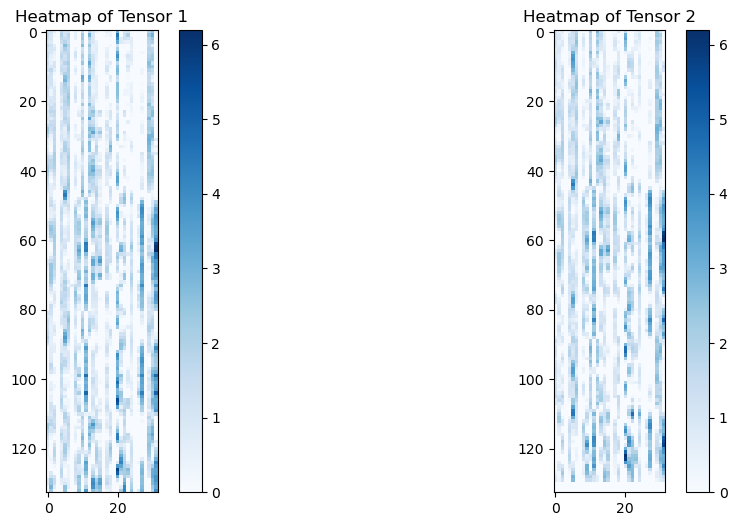

In [80]:
import matplotlib.pyplot as plt
data1 = input2[34].numpy()
data2 = input2[90]
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# First heatmap
im1 = axs[0].imshow(data1, cmap='Blues', interpolation='nearest')
axs[0].set_title('Heatmap of Tensor 1')
fig.colorbar(im1, ax=axs[0])  # Add colorbar to the first subplot

# Second heatmap
im2 = axs[1].imshow(data2, cmap='Blues', interpolation='nearest')
axs[1].set_title('Heatmap of Tensor 2')
fig.colorbar(im2, ax=axs[1])  # Add colorbar to the second subplot

plt.show()